# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [149]:
### YOUR CODE HERE ###

# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for modeling and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows of data

In [6]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [9]:
# Check data type of each column
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [11]:
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [16]:
display(df_original['satisfaction'].value_counts(dropna=False))
display(df_original['satisfaction'].value_counts(dropna=False, normalize=True))

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

**Question:** How many satisfied and dissatisfied customers were there?

There are 71,087 satisfied and 58,793 dissatisfied customers.

**Question:** What percentage of customers were satisfied? 

Satisfied customers are about 54.7% and dissatisfied customers are about 45.3%

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [17]:
# Check missing values
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Why is it important to check how many rows and columns there are in the dataset?

To decide how to deal with the missing values. If the number is small, we can remove the missing rows, if not, we need to do something with the missing values rather than removal. 

### Check the number of rows and columns in the dataset

In [18]:
df_original.shape

(129880, 22)

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [115]:
df_subset = df_original.dropna(axis=0)

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [116]:
df_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [117]:
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [118]:
map_dict = {}
map_dict['Class'] = {"business": 3, "eco plus": 2, "eco": 1}
df_subset['Class'] = df_subset['Class'].str.lower().map(map_dict['Class'])

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [119]:
### YOUR CODE HERE ###
map_dict['satisfaction'] = {"satisfied": 1, "dissatisfied": 0}
df_subset['satisfaction'] = df_subset['satisfaction'].str.lower().map(map_dict['satisfaction'])

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [120]:
### YOUR CODE HERE ###
map_dict['Type of Travel'] = {"personal travel": 1, "business travel": 0}
df_subset['Type of Travel'] = df_subset['Type of Travel'].str.lower().map(map_dict['Type of Travel'])

In [121]:
map_dict['Customer Type'] = {"loyal customer": 1, "disloyal customer": 0}
df_subset['Customer Type'] = df_subset['Customer Type'].str.lower().map(map_dict['Customer Type'])

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [126]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Customer Type                      129487 non-null  int64  
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  int64  
 4   Class                              129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [134]:
df_subset

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,47,1,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,0,63,1,3,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,0,69,1,1,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,0,66,1,1,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [135]:
X = df_subset.drop(['satisfaction'], axis=1)
y = df_subset['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [139]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

It learns fast and is pretty much transparent what is going on inside.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [144]:
dt_accuracy = metrics.accuracy_score(y_test, dt_pred)
dt_precision = metrics.precision_score(y_test, dt_pred)
dt_recall = metrics.recall_score(y_test, dt_pred)
dt_f1 = metrics.f1_score(y_test, dt_pred) 

print(f"Accuracy : {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall   : {dt_recall}")
print(f"F1       : {dt_f1}")

Accuracy : 0.9354998146546398
Precision: 0.9421141888072357
Recall   : 0.9399887196841512
F1       : 0.9410502540937323


**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

We may do the hyperparameter tuning to optimize the decision tree

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

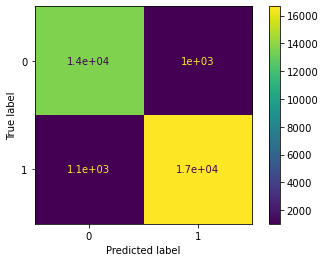

In [148]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=decision_tree.classes_)
disp.plot()
plt.show()

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

We got almost similar False Negatives and False Positive Values resulting similar score for Recall and Precision.
Also, True Positives and True Negatives are more than 10 times of False Negatives and False Positivies.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

[Text(558.0, 570.7800000000001, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 97115\nvalue = [43963, 53152]'),
 Text(279.0, 407.70000000000005, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 43502\nvalue = [34098, 9404]'),
 Text(139.5, 244.62, 'Seat comfort <= 0.5\ngini = 0.247\nsamples = 38022\nvalue = [32531, 5491]'),
 Text(69.75, 81.53999999999996, '\n  (...)  \n'),
 Text(209.25, 81.53999999999996, '\n  (...)  \n'),
 Text(418.5, 244.62, 'Seat comfort <= 4.5\ngini = 0.408\nsamples = 5480\nvalue = [1567, 3913]'),
 Text(348.75, 81.53999999999996, '\n  (...)  \n'),
 Text(488.25, 81.53999999999996, '\n  (...)  \n'),
 Text(837.0, 407.70000000000005, 'Ease of Online booking <= 3.5\ngini = 0.3\nsamples = 53613\nvalue = [9865, 43748]'),
 Text(697.5, 244.62, 'Inflight entertainment <= 4.5\ngini = 0.485\nsamples = 14645\nvalue = [6063, 8582]'),
 Text(627.75, 81.53999999999996, '\n  (...)  \n'),
 Text(767.25, 81.53999999999996, '\n  (...)  \n'),
 Text(976.5, 244.62, 'Customer Type <= 0

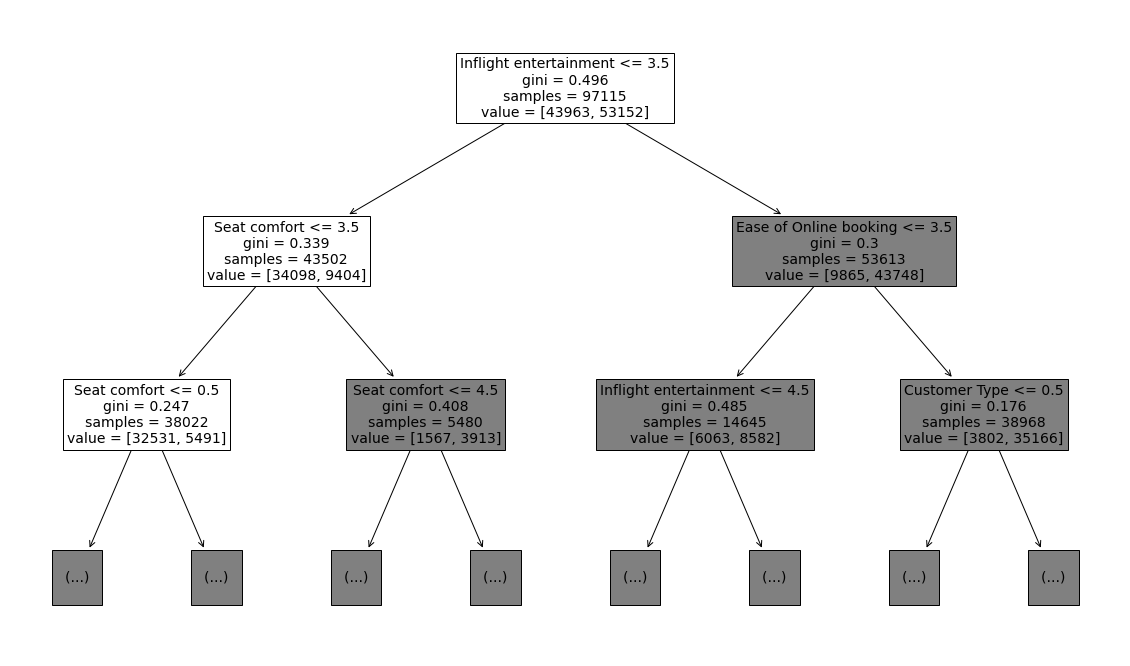

In [153]:
plt.figure(figsize=(20, 12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names = X.columns)

### Build a feature importance graph

Uncover which features might be most important to your decision tree model by building a feature importance graph. 

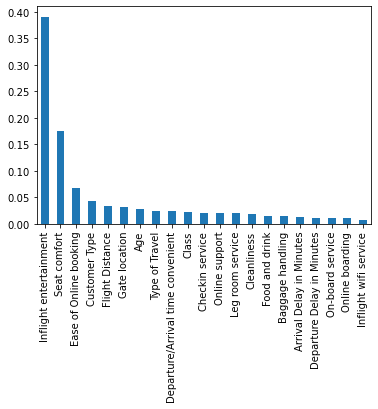

In [169]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.show()

**Question:** Based on the feature importance graph, which features are the most important for this model?

The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features for this model. 

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [170]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [171]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15

**Question:** How can you determine the best combination of values for the hyperparameters? 

use best_estimator_ to get the optimized hyper parameters

### Compute the best combination of values for the hyperparameters

In [172]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Question:** What is the best combination of values for the hyperparameters? 

[Write your response here. Double-click (or enter) to edit.]

<strong> Question: What was the best average validation score? </strong>

In [173]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9452


**Question:** What is the best average validation score? 

The best validation score is 0.9454.

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [174]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create a table of results.
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                          'F1': f1,
                          'Recall': recall,
                          'Precision': precision,
                          'Accuracy': accuracy},
                         ignore_index=True)

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945214,0.935487,0.955169,0.940648


**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The F1 score for the decision tree that was not hyperparameter tuned is 0.9410502540937323 and the F1 score for the hyperparameter-tuned decision tree is 0.945214. While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model. 

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

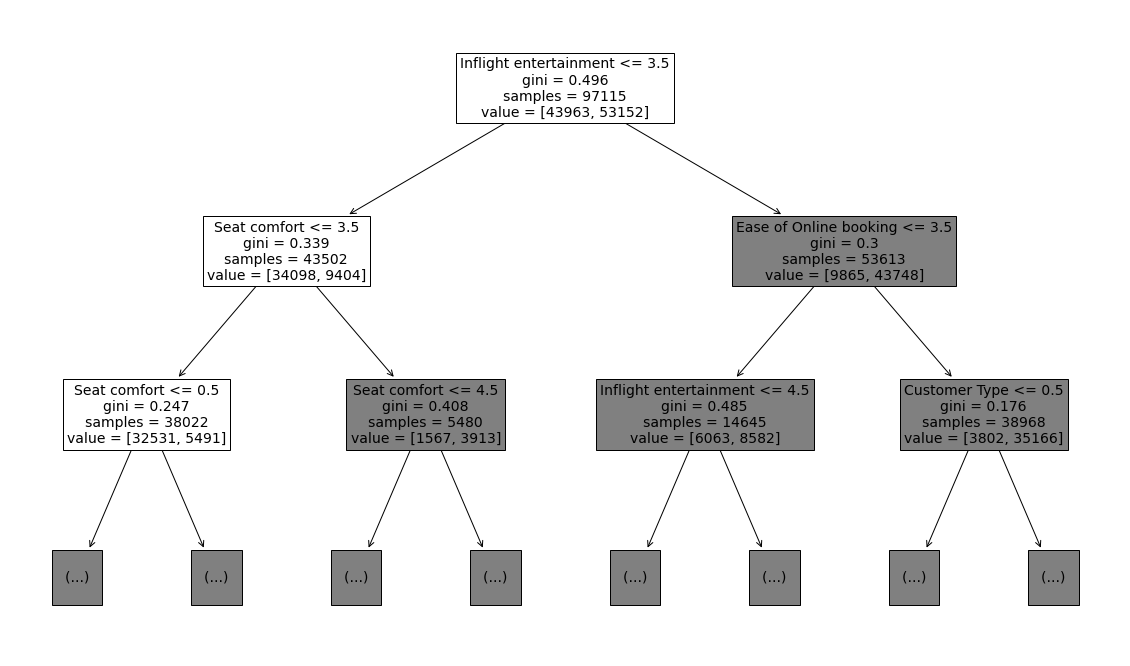

In [175]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

The plot makes it seem like `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are among the most important features. The code below outputs a "most important" features graph from the model.

### Build another feature importance graph

Just like you did for your first decision tree, build another feature importance graph to validate which features are most important.

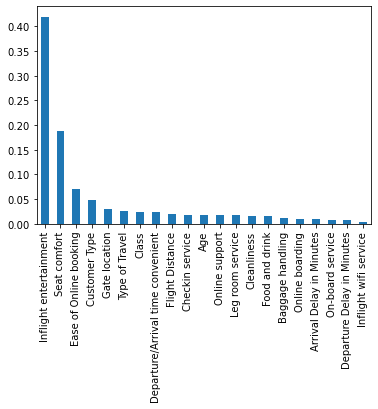

In [177]:
importances = clf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
plt.show()

**Question:** Did the feature importance graph confirm your most important features? 

Yes. The feature importance graph seems to confirm that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the "most important" features for this model. 

**Question:** What do you think is the most important metric in this business case?

Because the costs of False Positives and Flase Negatives are not clarified fully, f-1 score could be the most important metric since it balances precision and recall.